# Import necessary library

In [1]:
import json

import nltk
nltk.download('vader_lexicon')
!pip install nlp_utils

import pandas as pd
import numpy as np
import torch
import pickle
import tqdm
import random
import nlp_utils as nu
from collections import Counter
from torch.utils import data

import string
string.punctuation

!pip install langid
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sysadm/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
!pip install stop-words
!pip install stop-words

from stop_words import get_stop_words

#!pip install googletrans==4.0.0-rc1

!pip install indic-transliteration

from indic_transliteration import sanscript



# Remove stopwords

In [3]:
import string
import re
from nltk.corpus import stopwords
hindi_stopwords = get_stop_words('hi')  # 'hi' is the ISO 639-1 code for Hindi
#hindi_stopwords
# Define the source and target scripts
source_script = sanscript.DEVANAGARI
target_script = sanscript.ITRANS
# Transliterate Hindi to Roman script (English characters)
transliterated_text = [sanscript.transliterate(word, source_script, target_script) for word in hindi_stopwords]

# Convert transliterated words to lowercase
lowercase_transliterated_text = [word.lower() for word in transliterated_text]

# Print the lowercase transliterated words
#print(lowercase_transliterated_text)
#print the hindi stopwords
hindi_stopwords = lowercase_transliterated_text
#hindi_stopwords
english_stopwords = set(stopwords.words('english'))
stop_words = set(english_stopwords)  # English stopwords

# Add Hindi stopwords to the set
hindi_stop_words = set(hindi_stopwords)  # Add your Hindi stopwords here
hindi_stop_words

stop_words.update(hindi_stop_words)
stop_words
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Remove ordinal numbers
    text = re.sub(r'\b\d+(st|nd|rd|th)\b', '', text)

    # Remove extra white spaces
    text = ' '.join(text.split())

    # Remove stopwords
    total_stop_words = stop_words
    text = ' '.join([word for word in text.split() if word not in total_stop_words])

    return text




# Load the data

In [4]:
# Open and parse the JSON file
with open('.//MaSaC_train_erc.json', 'r') as json_file:
    train_data = json.load(json_file)

In [5]:
train_data[0]

{'episode': 'roseshantstobeadopted.wmv',
 'speakers': ['maya',
  'indu',
  'rosesh',
  'indu',
  'maya',
  'indu',
  'rosesh',
  'indu',
  'sahil',
  'rosesh',
  'maya',
  'indu',
  'sahil',
  'monish',
  'maya',
  'indu',
  'maya',
  'indu',
  'indu',
  'maya',
  'rosesh',
  'maya'],
 'utterances': ['kya kya bhar ke rakha hai indravadan ne is ghar mein indravadan please tum sari bekar ki chijen bahar kyon nahin fekte?',
  'ok, chalo rosesh chalo bahar',
  'momma! hath chhodiye dad!',
  'dekho maya ya na bol raha hai! fir tum hi kahogi faltu chijen jama karte ho fekte nahin ho, chalo',
  'indravadan, tum kitne salo se ye joke maar rahe ho. koi hota hai aaj tak?',
  'kaikai pe joke maroge to manthra thodi na hasegi',
  'very funny',
  'maya, monisha aur sahil aa rahe hain, dekhna yahi jo un per istemal karta hun aur dekhna vah kitna haste hain',
  'hi guys',
  'hi',
  'hi darling. achcha indravadan, please ya kachra bahar fenko!',
  'ok maya, chalo rosesh tumhen bahar fenk au',
  'mom! 

In [6]:
# Open and parse the JSON file
with open('.//MaSaC_val_erc.json', 'r') as json_file:
    validation_data = json.load(json_file)

In [7]:
validation_data[0]

{'episode': 'roseshantstobeadopted.wmv',
 'speakers': ['good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'rosesh',
  'rosesh',
  'maya',
  'rosesh'],
 'utterances': ['ye kya kar raha hai rosesh? bharat tera desh! bhartiya insan hai saccha. kisi ka khat padhna nahin hai achcha.',
  'hahaha khat padh le rosesh baby or padhne de hamen bhi. kitna achcha lagta hai balon mein gel, ding dong bell.',
  'kavita acchi hai lekin khayal achcha nahin hai, villain rosesh. momma ne kaha hai kisi aur ka khat padhna galat baat hai',
  'galat hai, par momma ne tumse kaha tha ki do bar brush karna aur tumne sirf ek bar kiya tha kya vah galat nahin tha?',
  'galat tha per',
  'momma ne tumse jab green chatni mangi thi aur tumne red pass ki thi kya vah galat nahin tha?',
  'wo to galat tha',
  'pichhle sal momma ki nayi hair style ostrich jesi thi aur tumne unhen apsara kaha tha kya vah galat nahin tha?',
  '

# Total number of  episode in Train data


In [8]:
# Create a list to store  episode names
total_episodes_1 = []

for conversation in train_data:
    episode = conversation["episode"]
    emotions = conversation["emotions"]

    # Add the episode name to the set of unique episodes
    total_episodes_1.append(episode)


# Print the total number of  conversation topics or episodes
print("Total episode topics:", len(total_episodes_1))

Total episode topics: 343


# To view all episode name

In [9]:
total_episodes_1

['roseshantstobeadopted.wmv',
 'roseshantstobeadopted.wmv',
 'roseshantstobeadopted.wmv',
 'roseshantstobeadopted.wmv',
 'roseshantstobeadopted.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'video1.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'yamraj.wmv',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'finale.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'indravadanmissing.avi',
 'sharman.wmw',
 'sharman.wmw',
 'sharman.wmw',
 'sharman.wmw',
 'sharman.wmw',
 'sharman.wmw',
 'soniyaprediction.avi',
 'soniyaprediction.avi',
 'soniyaprediction.avi',
 'soniyaprediction.avi',
 'soniyaprediction.avi',
 'soniyaprediction.avi',
 '

In [10]:
import pandas as pd


# Create an empty list to store the data for each conversation
conversation_data = []

# Iterate through the JSON data and construct a DataFrame for each conversation
for conversation in train_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Create a DataFrame for the current conversation
    df = pd.DataFrame({
        "Episode": [episode] * len(speakers),
        "Speakers": speakers,
        "Utterances": utterances,
        "Emotions": emotions
    })

    # Append the DataFrame to the list
    conversation_data.append(df)

# Concatenate all conversation DataFrames into one DataFrame
final_df = pd.concat(conversation_data, ignore_index=True)
final_df.head(5)

,Episode,Speakers,Utterances,Emotions
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt
2,roseshantstobeadopted.wmv,rosesh,momma! hath chhodiye dad!,anger
3,roseshantstobeadopted.wmv,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral
4,roseshantstobeadopted.wmv,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral


# Validition data

In [11]:
import pandas as pd


# Create an empty list to store the data for each conversation
conversation_data = []

# Iterate through the JSON data and construct a DataFrame for each conversation
for conversation in validation_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Create a DataFrame for the current conversation
    df = pd.DataFrame({
        "Episode": [episode] * len(speakers),
        "Speakers": speakers,
        "Utterances": utterances,
        "Emotions": emotions
    })

    # Append the DataFrame to the list
    conversation_data.append(df)

# Concatenate all conversation DataFrames into one DataFrame
val_df = pd.concat(conversation_data, ignore_index=True)
val_df.head(5)

,Episode,Speakers,Utterances,Emotions
0,roseshantstobeadopted.wmv,good rosesh,ye kya kar raha hai rosesh? bharat tera desh! ...,neutral
1,roseshantstobeadopted.wmv,bad rosesh,hahaha khat padh le rosesh baby or padhne de h...,neutral
2,roseshantstobeadopted.wmv,good rosesh,kavita acchi hai lekin khayal achcha nahin hai...,neutral
3,roseshantstobeadopted.wmv,bad rosesh,"galat hai, par momma ne tumse kaha tha ki do b...",contempt
4,roseshantstobeadopted.wmv,good rosesh,galat tha per,neutral


#  find how many distinct emotions exist in training conversation

In [12]:
# Find distinct emotions
distinct_emotions = final_df['Emotions'].unique()

# Print distinct emotions
print("Distinct Emotions:")
for emotion in distinct_emotions:
    print(emotion)

Distinct Emotions:
disgust
contempt
anger
neutral
joy
sadness
fear
surprise


# Visualize the emotion status count in training conversation

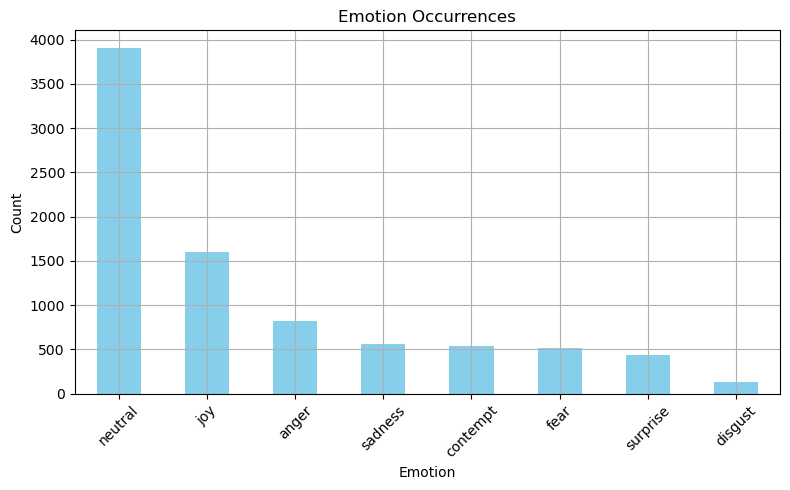

In [13]:
import matplotlib.pyplot as plt

# Count the occurrences of each emotion
emotion_counts = final_df['Emotions'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Occurrences')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
# Show the plot
plt.show()


# Visualize the emotion status in percentage on overall training conversation

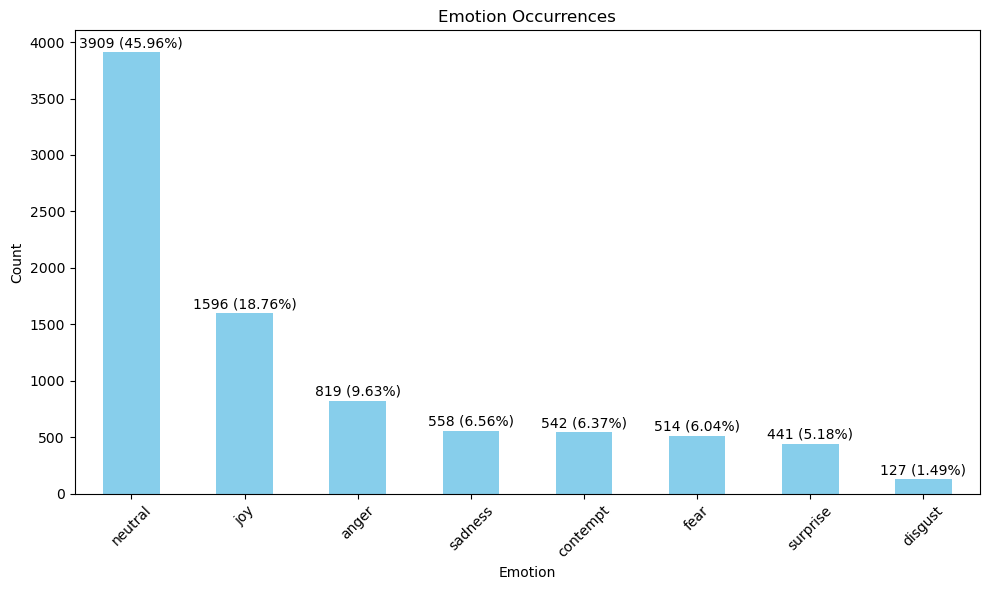

In [14]:
import matplotlib.pyplot as plt

# Assuming you already have 'distinct_emotions' and 'data' from your previous code

# Count the occurrences of each emotion
emotion_counts = final_df['Emotions'].value_counts()

# Calculate the percentage of each emotion
total_emotions = len(final_df)
emotion_percentages = (emotion_counts / total_emotions) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Occurrences')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add percentage labels above each bar
for i, v in enumerate(emotion_counts):
    ax.text(i, v + 20, f'{v} ({emotion_percentages[i]:.2f}%)', ha='center', va='bottom')

# Show the plot
#plt.savefig("./emotionoccures.png")
plt.show()


# Remove stopwords and add a columns of clean_text

In [15]:
# Apply preprocessing to the 'Utterances' column
final_df['Clean_text'] = final_df['Utterances'].apply(preprocess_text)

# Print the first few rows of the modified DataFrame
final_df

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust,kya kya bhar rakha indravadan ghar mein indrav...
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt,ok chalo rosesh chalo bahar
2,roseshantstobeadopted.wmv,rosesh,momma! hath chhodiye dad!,anger,momma hath chhodiye dad
3,roseshantstobeadopted.wmv,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral,dekho maya bol fir tum kahogi faltu chijen jam...
4,roseshantstobeadopted.wmv,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral,indravadan tum kitne salo joke maar aaj tak
...,...,...,...,...,...
8501,radhabaileaves,rosesh,lekin what about my ghadi? 17000 ki ghadi hai ...,sadness,lekin ghadi ghadi momma recurring alarm baje a...
8502,radhabaileaves,sita or geeta,"nhi nhi mujhe yahan pe kaamich nhi karna hai, ...",anger,nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun
8503,radhabaileaves,maya,ahan!,joy,ahan
8504,radhabaileaves,sita or geeta,goodbye!,fear,goodbye


In [16]:
# Apply preprocessing to the 'Utterances' column
val_df['Clean_text'] = val_df['Utterances'].apply(preprocess_text)

# Print the first few rows of the modified DataFrame
val_df

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,good rosesh,ye kya kar raha hai rosesh? bharat tera desh! ...,neutral,kya kar rosesh bharat tera desh bhartiya insan...
1,roseshantstobeadopted.wmv,bad rosesh,hahaha khat padh le rosesh baby or padhne de h...,neutral,hahaha khat padh le rosesh baby padhne de hame...
2,roseshantstobeadopted.wmv,good rosesh,kavita acchi hai lekin khayal achcha nahin hai...,neutral,kavita acchi lekin khayal achcha nahin villain...
3,roseshantstobeadopted.wmv,bad rosesh,"galat hai, par momma ne tumse kaha tha ki do b...",contempt,galat par momma tumse bar brush karna aur tumn...
4,roseshantstobeadopted.wmv,good rosesh,galat tha per,neutral,galat per
...,...,...,...,...,...
1349,prefinale,monish,sahil sahil sahil. sirf 4 din bache hai or sar...,fear,sahil sahil sahil sirf din bache sari ladkiyan...
1350,prefinale,sahil,haan lekin mom unn charo me se kisi ek ko fina...,neutral,haan lekin mom unn charo ek finalise kar lengi
1351,prefinale,monish,mummy ji ko to unme se koi pasand nhi hai,sadness,mummy ji unme pasand nhi
1352,prefinale,sahil,rosesh ko?,neutral,rosesh


In [17]:
# 

In [18]:
train = final_df[["Emotions","Clean_text"]]
train

,Emotions,Clean_text
0,disgust,kya kya bhar rakha indravadan ghar mein indrav...
1,contempt,ok chalo rosesh chalo bahar
2,anger,momma hath chhodiye dad
3,neutral,dekho maya bol fir tum kahogi faltu chijen jam...
4,neutral,indravadan tum kitne salo joke maar aaj tak
...,...,...
8501,sadness,lekin ghadi ghadi momma recurring alarm baje a...
8502,anger,nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun
8503,joy,ahan
8504,fear,goodbye


# print maximum length length of the utterence 

In [19]:
# Assuming train is the DataFrame containing the 'Clean_text' column
max_words = train['Clean_text'].apply(lambda x: len(x.split())).max()
print(f"The maximum number of words in an utterance is: {max_words}")


The maximum number of words in an utterance is: 92


In [20]:
# Assuming 'train' is the DataFrame containing the 'Clean_text' column
max_words_index = train['Clean_text'].apply(lambda x: len(x.split())).idxmax()
print(f"The index number of the row with the maximum number of words: {max_words_index}")


The index number of the row with the maximum number of words: 2315


In [21]:
train["Clean_text"][2315]

'khar khar khar khar chale cinema reel cinema parde par aaya sushil sushil acting uske muscles kartein hain cehera hain blank mara kabootar dailogue bole lagta hain bigda hain padooshi scooter sushil heroine sandhya kapde jitne taklu saar par hoon baalaage suniyegasandhya acche dete hain chipkaali expression sandhya acche deti hain chipkali expression lekin phirbhi sandhya banega best actress iss saal sushil muscles milega award kyuki uske papa hain jury par samjhe picture deenge start critics kyuki wo hain producers chaamche phir main jaa kar dekhte hoon kyu kyu main dard hain'

In [22]:
validation = val_df[["Emotions","Clean_text"]]

# Number of unique words in traindata

In [23]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the 'clean_text' column
unique_words = set(' '.join(train['Clean_text']).split())
sorted_unique_words = sorted(unique_words)
len(sorted_unique_words)
#print(sorted_unique_words)


11381

# Dictionary form of word-index

In [24]:
sorted_unique_words[0]

'aa'

In [25]:
word_to_index = {word: index for index, word in enumerate(sorted_unique_words)}
word_to_index

{'aa': 0,
 'aaa': 1,
 'aaaa': 2,
 'aaaaa': 3,
 'aaaaaa': 4,
 'aaaaaannneeee': 5,
 'aaaaah': 6,
 'aaah': 7,
 'aaahaaahaaa': 8,
 'aaahahaabhi': 9,
 'aaahh': 10,
 'aaak': 11,
 'aaanhahavery': 12,
 'aaantwenty': 13,
 'aab': 14,
 'aachar': 15,
 'aachhii': 16,
 'aadami': 17,
 'aadarsh': 18,
 'aadat': 19,
 'aadh': 20,
 'aadha': 21,
 'aadhadete': 22,
 'aadhe': 23,
 'aadhi': 24,
 'aadi': 25,
 'aadmi': 26,
 'aae': 27,
 'aaee': 28,
 'aaega': 29,
 'aaegee': 30,
 'aaegi': 31,
 'aaenge': 32,
 'aaengi': 33,
 'aag': 34,
 'aage': 35,
 'aagya': 36,
 'aah': 37,
 'aahaan': 38,
 'aahahayessyess': 39,
 'aahhh': 40,
 'aahhhh': 41,
 'aahi': 42,
 'aahif': 43,
 'aahmonishahappy': 44,
 'aaho': 45,
 'aahokinna': 46,
 'aai': 47,
 'aaila': 48,
 'aailadaddy': 49,
 'aaine': 50,
 'aainmai': 51,
 'aaiye': 52,
 'aaiyedaddy': 53,
 'aaj': 54,
 'aaja': 55,
 'aajad': 56,
 'aajadi': 57,
 'aajao': 58,
 'aajeeb': 59,
 'aajkal': 60,
 'aajse': 61,
 'aajtak': 62,
 'aaju': 63,
 'aakar': 64,
 'aake': 65,
 'aakhain': 66,
 'aakhi': 6

# Add one words for unknown words 

In [26]:
word_to_index['unknown_word'] = len(word_to_index)
sorted_unique_words.append('unknown_word')


In [27]:
len(sorted_unique_words)

11382

In [28]:
sorted_unique_words[-1]

'unknown_word'

In [29]:
sorted_unique_words

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaannneeee',
 'aaaaah',
 'aaah',
 'aaahaaahaaa',
 'aaahahaabhi',
 'aaahh',
 'aaak',
 'aaanhahavery',
 'aaantwenty',
 'aab',
 'aachar',
 'aachhii',
 'aadami',
 'aadarsh',
 'aadat',
 'aadh',
 'aadha',
 'aadhadete',
 'aadhe',
 'aadhi',
 'aadi',
 'aadmi',
 'aae',
 'aaee',
 'aaega',
 'aaegee',
 'aaegi',
 'aaenge',
 'aaengi',
 'aag',
 'aage',
 'aagya',
 'aah',
 'aahaan',
 'aahahayessyess',
 'aahhh',
 'aahhhh',
 'aahi',
 'aahif',
 'aahmonishahappy',
 'aaho',
 'aahokinna',
 'aai',
 'aaila',
 'aailadaddy',
 'aaine',
 'aainmai',
 'aaiye',
 'aaiyedaddy',
 'aaj',
 'aaja',
 'aajad',
 'aajadi',
 'aajao',
 'aajeeb',
 'aajkal',
 'aajse',
 'aajtak',
 'aaju',
 'aakar',
 'aake',
 'aakhain',
 'aakhi',
 'aakhir',
 'aakhiri',
 'aakhri',
 'aakr',
 'aalab',
 'aalas',
 'aalo',
 'aaloo',
 'aam',
 'aamaa',
 'aamin',
 'aamir',
 'aana',
 'aanaa',
 'aanahantumhari',
 'aanbtao',
 'aanchal',
 'aandha',
 'aane',
 'aankh',
 'aankhe',
 'aankhein',
 'aankhen',
 'aankhne',

In [30]:
unique_words_set = set(sorted_unique_words)
len(unique_words_set)

11382

# Vectorized form of the clean text train data

In [31]:
import numpy as np

# Function to vectorize the text
def vectorize_text(text, unique_words_list):
    word_to_index = {word: index for index, word in enumerate(unique_words_list)}
    vector = np.zeros(len(unique_words_list))  
    words = text.split()
    for word in words:
        if word in word_to_index:
            vector[word_to_index[word]] += 1
        else:
            vector[-1] += 1  # Increment for unknown words
    return vector

# Creating a dictionary to store the vectors
vectors_dict = {}

for index, row in train.iterrows():
    vectors_dict[index] = vectorize_text(row['Clean_text'], sorted_unique_words)

# Printing the vector for each row
for index, vector in vectors_dict.items():
    print(f"Vector for index {index}: {vector}")


Vector for index 0: [0. 0. 0. ... 0. 0. 0.]
Vector for index 1: [0. 0. 0. ... 0. 0. 0.]
Vector for index 2: [0. 0. 0. ... 0. 0. 0.]
Vector for index 3: [0. 0. 0. ... 0. 0. 0.]
Vector for index 4: [0. 0. 0. ... 0. 0. 0.]
Vector for index 5: [0. 0. 0. ... 0. 0. 0.]
Vector for index 6: [0. 0. 0. ... 0. 0. 0.]
Vector for index 7: [1. 0. 0. ... 0. 0. 0.]
Vector for index 8: [0. 0. 0. ... 0. 0. 0.]
Vector for index 9: [0. 0. 0. ... 0. 0. 0.]
Vector for index 10: [0. 0. 0. ... 0. 0. 0.]
Vector for index 11: [0. 0. 0. ... 0. 0. 0.]
Vector for index 12: [0. 0. 0. ... 0. 0. 0.]
Vector for index 13: [0. 0. 0. ... 0. 0. 0.]
Vector for index 14: [0. 0. 0. ... 0. 0. 0.]
Vector for index 15: [0. 0. 0. ... 0. 0. 0.]
Vector for index 16: [0. 0. 0. ... 0. 0. 0.]
Vector for index 17: [0. 0. 0. ... 0. 0. 0.]
Vector for index 18: [0. 0. 0. ... 0. 0. 0.]
Vector for index 19: [0. 0. 0. ... 0. 0. 0.]
Vector for index 20: [0. 0. 0. ... 0. 0. 0.]
Vector for index 21: [0. 0. 0. ... 0. 0. 0.]
Vector for index 22:

In [32]:
len(vectors_dict)

8506

In [33]:
len(vectors_dict[0])

11382

In [34]:
np.sum(vectors_dict[0])

17.0

# Vectorized form of validation set

In [35]:
import numpy as np

# Function to vectorize the text
def vectorize_text(text, unique_words_list):
    word_to_index = {word: index for index, word in enumerate(unique_words_list)}
    vector = np.zeros(len(unique_words_list)) 
    words = text.split()
    for word in words:
        if word in word_to_index:
            vector[word_to_index[word]] += 1
        else:
            vector[-1] += 1  # Increment for unknown words
    return vector

# Creating a dictionary to store the vectors
vectors_dict1 = {}

for index, row in validation.iterrows():
    vectors_dict1[index] = vectorize_text(row['Clean_text'], sorted_unique_words)

# Printing the vector for each row
for index, vector in vectors_dict1.items():
    print(f"Vector for index {index}: {vector}")


Vector for index 0: [0. 0. 0. ... 0. 0. 2.]
Vector for index 1: [0. 0. 0. ... 0. 0. 4.]
Vector for index 2: [0. 0. 0. ... 0. 0. 0.]
Vector for index 3: [0. 0. 0. ... 0. 0. 0.]
Vector for index 4: [0. 0. 0. ... 0. 0. 0.]
Vector for index 5: [0. 0. 0. ... 0. 0. 0.]
Vector for index 6: [0. 0. 0. ... 0. 0. 0.]
Vector for index 7: [0. 0. 0. ... 0. 0. 2.]
Vector for index 8: [0. 0. 0. ... 0. 0. 0.]
Vector for index 9: [0. 0. 0. ... 0. 0. 2.]
Vector for index 10: [0. 0. 0. ... 0. 0. 0.]
Vector for index 11: [0. 0. 0. ... 0. 0. 3.]
Vector for index 12: [0. 0. 0. ... 0. 0. 0.]
Vector for index 13: [0. 0. 0. ... 0. 0. 0.]
Vector for index 14: [0. 0. 0. ... 0. 0. 0.]
Vector for index 15: [0. 0. 0. ... 0. 0. 0.]
Vector for index 16: [0. 0. 0. ... 0. 0. 0.]
Vector for index 17: [0. 0. 0. ... 0. 0. 0.]
Vector for index 18: [1. 0. 0. ... 0. 0. 0.]
Vector for index 19: [0. 0. 0. ... 0. 0. 0.]
Vector for index 20: [0. 0. 0. ... 0. 0. 0.]
Vector for index 21: [0. 0. 0. ... 0. 0. 0.]
Vector for index 22:

# Use sklearn packages 

In [36]:
X_train = np.array(list(vectors_dict.values()))
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
X_validation = np.array(list(vectors_dict1.values()))
X_validation

array([[0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 4.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 2.]])

In [38]:
y_train = train['Emotions']
y_train

0        disgust
1       contempt
2          anger
3        neutral
4        neutral
          ...   
8501     sadness
8502       anger
8503         joy
8504        fear
8505     disgust
Name: Emotions, Length: 8506, dtype: object

In [39]:
y_validation = validation["Emotions"]
y_validation

0        neutral
1        neutral
2        neutral
3       contempt
4        neutral
          ...   
1349        fear
1350     neutral
1351     sadness
1352     neutral
1353        fear
Name: Emotions, Length: 1354, dtype: object

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Fit the KNN model 

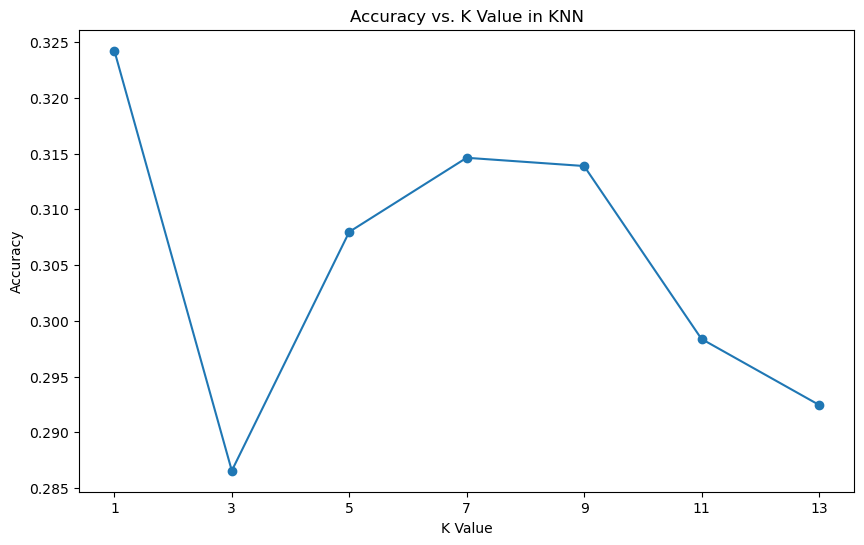

In [46]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Define different values of k
k_values = [1, 3, 5, 7, 9, 11,13]
accuracies = []
conf_matrices = []

for k in k_values:
    # Fitting the model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Predicting on the validation set
    y_pred_knn = knn_model.predict(X_validation)

    # Calculate the accuracy
    accuracy_knn = accuracy_score(y_validation, y_pred_knn)
    accuracies.append(accuracy_knn)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_validation, y_pred_knn)
    conf_matrices.append(conf_matrix)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K Value in KNN')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()



In [47]:
#Dataframe for K value and accuracy

In [48]:
import pandas as pd

# Printing accuracies for different k values
for i, k in enumerate(k_values):
    print(f"Accuracy for k={k}: {accuracies[i]}")

# Creating a DataFrame for k values and accuracies
data = {'K Value': k_values, 'Accuracy': accuracies}
df_knn = pd.DataFrame(data)
print(df_knn)


Accuracy for k=1: 0.3242245199409158
Accuracy for k=3: 0.2865583456425406
Accuracy for k=5: 0.30797636632200887
Accuracy for k=7: 0.31462333825701627
Accuracy for k=9: 0.31388478581979323
Accuracy for k=11: 0.2983751846381093
Accuracy for k=13: 0.29246676514032494
   K Value  Accuracy
0        1  0.324225
1        3  0.286558
2        5  0.307976
3        7  0.314623
4        9  0.313885
5       11  0.298375
6       13  0.292467


In [49]:
# Confusion matrix

In [50]:
# Plotting the confusion matrices
for i, conf_matrix in enumerate(conf_matrices):
    print(f"Confusion Matrix for k = {k_values[i]}:")
    print(conf_matrix)


Confusion Matrix for k = 1:
[[ 13   1   2   4  26  65   2   5]
 [  9   2   0   2  20  32   5   4]
 [  0   0   1   1   7   9   0   3]
 [  2   2   0  12  16  44   8   4]
 [  7   2   4  16  83  95   5  16]
 [ 38   3   1  31 200 311  10  39]
 [  1   3   0   9  35  63   8   7]
 [  1   0   1   4  27  23   1   9]]
Confusion Matrix for k = 3:
[[ 20   0   0   5  19  56   1  17]
 [ 18   0   1   4  11  32   0   8]
 [  3   0   2   2   2   6   0   6]
 [  5   3   0   9  13  45   2  11]
 [ 12   6   2  27  58  83   3  37]
 [ 67   5   3  36 112 263  11 136]
 [ 10   4   0  23  16  56   0  17]
 [  2   0   0   3   2  23   0  36]]
Confusion Matrix for k = 5:
[[ 14   1   0   3   4  66   3  27]
 [ 12   0   0   1   9  40   1  11]
 [  3   0   0   0   1   6   1  10]
 [  7   0   0   4   7  50   5  15]
 [  2   0   1  11  44 107   6  57]
 [ 36   1   0  21  45 305  14 211]
 [ 12   0   0  10   1  64  13  26]
 [  1   0   0   1   1  26   0  37]]
Confusion Matrix for k = 7:
[[  6   0   0   3   6  74   1  28]
 [ 12   0 

# Fit SVM model

In [51]:
#rbf kernal method

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

# Creating an SVM model
svm_model = SVC(kernel='rbf', class_weight='balanced')  # Use 'balanced' class weight for imbalanced datasets
svm_model.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_svm = confusion_matrix(y_validation, y_pred_svm)
print("Confusion Matrix for SVM:")
print(conf_matrix_svm)


Confusion Matrix for SVM:
[[ 26   6   2   3  32  22   7  20]
 [ 12  10   0   6  24  16   1   5]
 [  1   4   2   2   5   1   0   6]
 [ 11   1   0  16  14  17  11  18]
 [  9   6   1   8 101  47  14  42]
 [ 59  26   4  21 140 177  27 179]
 [ 13   5   1  19  29  22  18  19]
 [  2   2   1   2   4   7   2  46]]


In [53]:
from sklearn.metrics import accuracy_score

accuracy_svm = accuracy_score(y_validation, y_pred_svm)
print(f"Accuracy of the SVM model: {accuracy_svm}")


Accuracy of the SVM model: 0.29246676514032494


linear kernal

In [54]:
# Creating a linear SVM model
linear_svm_model = SVC(kernel='linear', class_weight='balanced')  # Use 'balanced' class weight for imbalanced datasets
linear_svm_model.fit(X_train, y_train)

# Making predictions
y_pred_linear_svm = linear_svm_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_linear_svm = confusion_matrix(y_validation, y_pred_linear_svm)
print("Confusion Matrix for Linear SVM:")
print(conf_matrix_linear_svm)

# Calculating the accuracy
accuracy_linear_svm = accuracy_score(y_validation, y_pred_linear_svm)
print(f"Accuracy of the Linear SVM model: {accuracy_linear_svm}")


Confusion Matrix for Linear SVM:
[[ 28   4   4   8   9  48   7  10]
 [ 13   9   2   8  11  22   4   5]
 [  3   6   6   1   1   3   1   0]
 [ 12   0   1  20   9  28  11   7]
 [ 16  10   6  16  66  86  15  13]
 [ 65  18  13  34  88 328  30  57]
 [ 11   6   5  22  15  43  16   8]
 [  3   4   1   2   0  31   2  23]]
Accuracy of the Linear SVM model: 0.3663220088626292


polynomial kernal

In [56]:
# Creating a polynomial SVM model with a third-degree polynomial kernel
poly_svm_model = SVC(kernel='poly', degree=3, class_weight='balanced')  # Use 'balanced' class weight for imbalanced datasets
poly_svm_model.fit(X_train, y_train)

# Making predictions
y_pred_poly_svm = poly_svm_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_poly_svm = confusion_matrix(y_validation, y_pred_poly_svm)
print("Confusion Matrix for Polynomial SVM (Degree 3):")
print(conf_matrix_poly_svm)

# Calculating the accuracy
accuracy_poly_svm = accuracy_score(y_validation, y_pred_poly_svm)
print(f"Accuracy of the Polynomial SVM (Degree 3) model: {accuracy_poly_svm}")


Confusion Matrix for Polynomial SVM (Degree 3):
[[  0   1   1   0   0  13   2 101]
 [  0   0   0   1   1  19   0  53]
 [  0   1   0   0   0   1   0  19]
 [  0   0   0   3   1  15   2  67]
 [  1   0   1   1   2  32   2 189]
 [  5   1   0   7   1  64   5 550]
 [  1   1   0   5   0  19   3  97]
 [  0   0   1   0   0   3   0  62]]
Accuracy of the Polynomial SVM (Degree 3) model: 0.09896602658788774


intersection kernal

In [57]:
# Creating an SVM model with an intersection kernel
intersection_svm_model = SVC(kernel='sigmoid', class_weight='balanced')  # Use 'balanced' class weight for imbalanced datasets
intersection_svm_model.fit(X_train, y_train)

# Making predictions
y_pred_intersection_svm = intersection_svm_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_intersection_svm = confusion_matrix(y_validation, y_pred_intersection_svm)
print("Confusion Matrix for SVM with Intersection Kernel:")
print(conf_matrix_intersection_svm)

# Calculating the accuracy
accuracy_intersection_svm = accuracy_score(y_validation, y_pred_intersection_svm)
print(f"Accuracy of the SVM with Intersection Kernel model: {accuracy_intersection_svm}")


Confusion Matrix for SVM with Intersection Kernel:
[[ 26  10  11   6  11  18  13  23]
 [  6  15  12  12   5   5   9  10]
 [  1   3   7   2   1   1   0   6]
 [  9   1   9  21   6   8  15  19]
 [ 16   8  24  20  59  17  28  56]
 [ 43  42  45  50  72  99  79 203]
 [ 12   7  15  29   9   7  27  20]
 [  3   4   3   1   1   3   2  49]]
Accuracy of the SVM with Intersection Kernel model: 0.22378138847858198


chi-square kernal

# Logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Creating a logistic regression model
logistic_model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Fitting the model
logistic_model.fit(X_train, y_train)

# Making predictions
y_pred_logistic = logistic_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_logistic = confusion_matrix(y_validation, y_pred_logistic)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_logistic)

# Calculating the accuracy
accuracy_logistic = accuracy_score(y_validation, y_pred_logistic)
print(f"Accuracy of the Logistic Regression model: {accuracy_logistic}")


Confusion Matrix for Logistic Regression:
[[ 35   5   2   9  11  32  10  14]
 [ 12  11   1  11  11  18   4   6]
 [  3   4   6   2   2   1   1   2]
 [  9   2   2  23  10  15  17  10]
 [ 11  10   3  17  81  54  17  35]
 [ 69  28   8  40  98 220  49 121]
 [ 11   8   3  21  14  29  23  17]
 [  2   3   1   3   2  13   3  39]]
Accuracy of the Logistic Regression model: 0.32348596750369274


# Naive-bayes

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Creating a Naive Bayes model
naive_bayes_model = MultinomialNB()

# Fitting the model
naive_bayes_model.fit(X_train, y_train)

# Making predictions
y_pred_naive_bayes = naive_bayes_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_naive_bayes = confusion_matrix(y_validation, y_pred_naive_bayes)
print("Confusion Matrix for Naive Bayes:")
print(conf_matrix_naive_bayes)

# Calculating the accuracy
accuracy_naive_bayes = accuracy_score(y_validation, y_pred_naive_bayes)
print(f"Accuracy of the Naive Bayes model: {accuracy_naive_bayes}")


Confusion Matrix for Naive Bayes:
[[  8   1   0   0  10  98   1   0]
 [  4   1   0   0  10  58   1   0]
 [  5   0   0   0   1  15   0   0]
 [  1   0   0   2   6  77   2   0]
 [  4   0   0   2  55 162   0   5]
 [ 18   1   0   4  49 554   5   2]
 [  5   1   0   1   6 111   2   0]
 [  1   0   0   0   2  60   1   2]]
Accuracy of the Naive Bayes model: 0.4608567208271787


# Random forest

In [41]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [44]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_validation)

# Calculate accuracy
accuracy = accuracy_score(y_validation, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.46824224519940916


In [45]:
# Calculating the confusion matrix
conf_matrix_forest = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_forest)

Confusion Matrix for Random Forest:
[[ 10   0   1   2   3  95   0   7]
 [  2   0   1   0   8  58   2   3]
 [  0   1   3   0   0  16   1   0]
 [  1   0   0  10   3  67   3   4]
 [  1   1   1   3  60 149   4   9]
 [ 12   3   0  14  53 518   9  24]
 [  1   0   1   3   6  93  15   7]
 [  0   0   0   0   0  48   0  18]]


#max depth 5

In [60]:
# Create a Random Forest classifier with max_depth parameter
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_classifier.predict(X_validation)

# Calculate accuracy
accuracy = accuracy_score(y_validation, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4675036927621861


In [61]:
# Calculating the confusion matrix
conf_matrix_forest = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_forest)

Confusion Matrix for Random Forest:
[[  0   0   0   0   0 118   0   0]
 [  0   0   0   0   0  74   0   0]
 [  0   0   0   0   0  21   0   0]
 [  0   0   0   0   0  88   0   0]
 [  0   0   0   0   0 228   0   0]
 [  0   0   0   0   0 633   0   0]
 [  0   0   0   0   0 126   0   0]
 [  0   0   0   0   0  66   0   0]]
